# Econometria de Séries Temporais

## Processos não estacionários, tendência estocástica e regressão espúria

João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

**Motivação**: \\

 Como estimar uma regra de política monetária (simplificada) para o Brasil?

## Hiato do produto com tendência determinística

Obtenha no SGS do Banco Central do Brasil a série do Índice de Atividade Econômica do Banco Central (IBC-Br) livre de efeitos sazonais.

In [1]:
# Baixar dados em CSV — série ajustada (24364)
url_csv <- "http://api.bcb.gov.br/dados/serie/bcdata.sgs.24364/dados?formato=csv"
ibc_br <- read.csv(url_csv, sep = ",", dec = ".", header = TRUE)

In [2]:
head(ibc_br)

,data.valor
,<chr>
1,"01/01/2003;70,50490"
2,"01/02/2003;71,68170"
3,"01/03/2003;71,35363"
4,"01/04/2003;71,17270"
5,"01/05/2003;70,12710"
6,"01/06/2003;70,28393"


In [3]:
tail(ibc_br)

,data.valor
,<chr>
265,"01/01/2025;108,34772"
266,"01/02/2025;109,05409"
267,"01/03/2025;109,78511"
268,"01/04/2025;109,91207"
269,"01/05/2025;109,12001"
270,"01/06/2025;109,05915"


Faça um gráfico do IBC-BR:

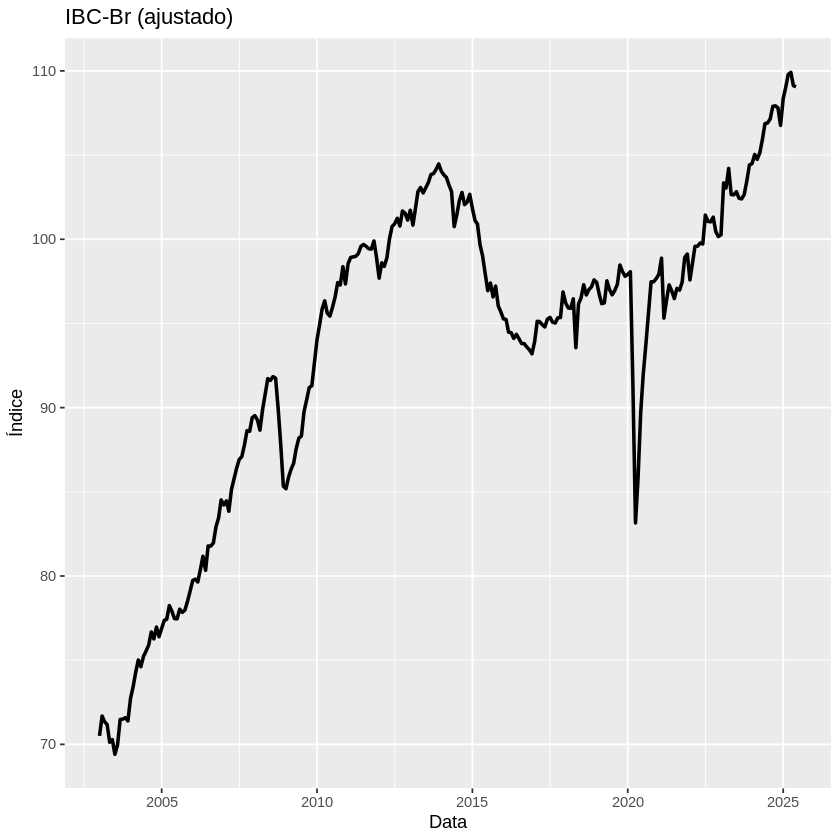

In [8]:
tmp <- do.call(rbind, strsplit(ibc_br[[1]], ";", fixed = TRUE))
ibc <- data.frame(data = as.Date(tmp[,1], "%d/%m/%Y"), valor = as.numeric(sub(",", ".", tmp[,2], fixed = TRUE)))
library(ggplot2)
ggplot(ibc, aes(data, valor)) + geom_line(linewidth = 1) + labs(title="IBC-Br (ajustado)", x="Data", y="Índice")


Crie um objeto para o 'tempo' que seja uma sequência que se inicia no valor um e tem o mesmo número de observações que os dados do IBC-Br.

In [10]:
tempo <- 1:nrow(ibc)

Agora, crie um objeto que é o quadrado do objeto anterior:

In [12]:
tempo2 <- tempo^2

Faça uma regressão linear do IBC-Br no tempo:

In [18]:
reg <- lm(ibc$valor ~ tempo)
summary(reg)



Call:
lm(formula = ibc$valor ~ tempo)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.739  -3.749  -1.663   4.561  11.152 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.173274   0.713263  112.40   <2e-16 ***
tempo        0.099615   0.004563   21.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.844 on 268 degrees of freedom
Multiple R-squared:  0.6401,	Adjusted R-squared:  0.6387 
F-statistic: 476.6 on 1 and 268 DF,  p-value: < 2.2e-16


Crie um objeto com a tendência (que é obtida com os valores previstos, 'fitted'; por exemplo, se o objeto da sua regressão foi denominado 'reg', utilize 'reg$fitted.values').

In [19]:
tendencia <- reg$fitted.values

Crie um objeto com a flutuação:

In [20]:
flutuacao <- reg$residuals

Faça um gráfico do hiato do produto:

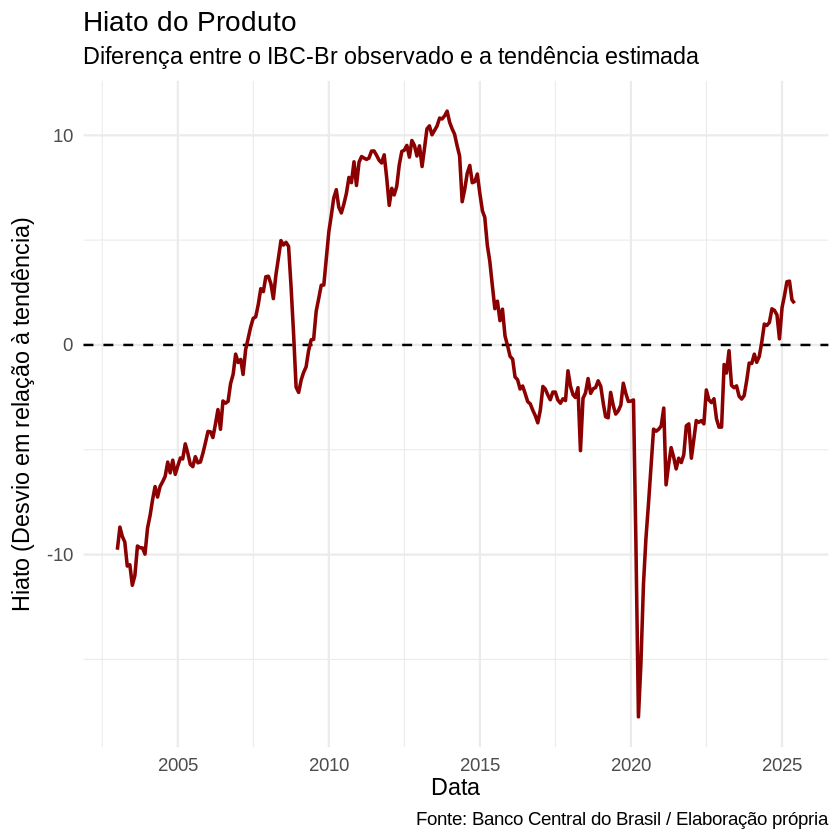

In [21]:
ggplot(ibc, aes(x = data, y = flutuacao)) +
  geom_hline(yintercept = 0, color = "black", linewidth = 0.7, linetype = "dashed") +
  geom_line(color = "darkred", linewidth = 1) +
  labs(
    title = "Hiato do Produto",
    subtitle = "Diferença entre o IBC-Br observado e a tendência estimada",
    x = "Data",
    y = "Hiato (Desvio em relação à tendência)",
    caption = "Fonte: Banco Central do Brasil / Elaboração própria"
  ) +
  theme_minimal(base_size = 14)

Faça o mesmo procedimento, mas para a tendência quadrática (considere na regressão tanto o tempo ($t$) quanto o seu valor ao quadrado ($t^2$):

## Passeios aleatórios

Simule uma série que seja um passeio aleatório:

In [ ]:
RW <- arima.sim(model= list(order = c(0, 1, 0)), n=200)

Faça um gráfico do passeio aleatório ao longo do tempo:

Simule uma série que seja um passeio aleatório com drift:

In [ ]:
RW_drift <- arima.sim(model= list(order = c(0, 1, 0)), n=200, mean=1,sd=5)

Faça um gráfico do passeio aleatório com drift ao longo do tempo:

## Correlação Espúria

Código adaptado do capítulo 4 de Pfaff (2008)

In [ ]:
set.seed (1301)                     # 'seed' para gerarmos o mesmos números pseudo-aleatórios

ex = rnorm (100)                    # erros da variável X
ey = rnorm (100)                    # erros da variável Y

t  = 1:100

X  = 0.9 * t + cumsum( ex )
Y  = 0.5 * t + cumsum( ey )

In [ ]:
data <- data.frame( t, Y, X )

ggplot(data) + geom_line(aes(x = t, y =  Y ), linewidth = 1.5, colour = "darkred") +
geom_line(aes(x = t, y =  X ), linewidth = 1.5, colour = "darkblue") +
  theme_classic() + labs(x = "", y="") +  theme(aspect.ratio=1)

In [ ]:
reg <- lm( Y ~ X )
summary( reg )

In [ ]:
install.packages("lmtest", quiet = TRUE)
library(lmtest)

In [ ]:
dwtest( reg )$statistic

# Regra de política monetária (bem simplificada)

Vamos considerar uma regra de política monetária bem simplificada. Para isso, obtenha junto ao SGS do BCB os dados da Taxa Selic e da Taxa de inflação acumulada em 12 meses.

### Taxa Selic

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Taxa de inflação acumulada em 12 meses

## Regressão linear

Faça uma regressão linear da taxa Selic no IPCA acumulado em 12 meses e no hiato do produto:

Se o hiato for zero e a inflação acumulada estiver na meta, qual é o valor que eu devo esperar para a taxa Selic?

Se o hiato for de 1,5% e a inflação acumulada estiver em 4,6%, qual é o valor que eu devo esperar para a taxa Selic?